### Install required packages (one time setup)

In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn

### Import necessary libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load given data

In [34]:
# Load spreadsheet
xl = pd.ExcelFile('assessment.xlsx')

# Load a sheet into a DataFrame by name
df = xl.parse('Data')
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset and basic info
df_info = df.info()
df_head = df.head()
df_describe = df.describe

df_head, df_info, df_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66083 entries, 0 to 66082
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   C_ID             66083 non-null  int64  
 1   C_AGE            66083 non-null  int64  
 2   C_EDU            27619 non-null  object 
 3   C_HSE            22167 non-null  object 
 4   PC               65597 non-null  float64
 5   INCM_TYP         36617 non-null  float64
 6   gn_occ           65205 non-null  object 
 7   NUM_PRD          66083 non-null  int64  
 8   CASATD_CNT       40991 non-null  float64
 9   MTHCASA          39045 non-null  float64
 10  MAXCASA          39045 non-null  float64
 11  MINCASA          39045 non-null  float64
 12  DRvCR            29708 non-null  float64
 13  MTHTD            14100 non-null  float64
 14  MAXTD            14100 non-null  float64
 15  Asset value      66083 non-null  float64
 16  HL_tag           2368 non-null   float64
 17  AL_tag      

(   C_ID  C_AGE     C_EDU                  C_HSE       PC  INCM_TYP  \
 0  1443     65   Masters  EXECUTIVE CONDOMINIUM  19250.0       6.0   
 1  1559     86  O-Levels    PRIVATE CONDOMINIUM  99018.0       2.0   
 2  1913     69  A-Levels                    NaN  10155.0       3.0   
 3  2032     70       NaN                    NaN  21863.0       2.0   
 4  2048     72  O-Levels  EXECUTIVE CONDOMINIUM  10641.0       NaN   
 
         gn_occ  NUM_PRD  CASATD_CNT   MTHCASA   MAXCASA   MINCASA  \
 0         PMEB        3         8.0   6896.91   4899.08    910.88   
 1         PMEB        4        13.0  51714.78  35740.55   1318.25   
 2         PMEB        4         1.0   5420.09   5420.09   5420.09   
 3      RETIREE        3         1.0  13596.65  13596.65  13596.65   
 4  BLUE COLLAR        4         2.0  51639.18  32689.93  18949.25   
 
           DRvCR      MTHTD      MAXTD  Asset value  HL_tag  AL_tag  \
 0  1.020768e+06  105000.00   25000.00    111896.91     NaN     NaN   
 1  8.32

In [35]:
df.describe()

,C_ID,C_AGE,PC,INCM_TYP,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT
count,66083.000000,66083.000000,65597.000000,36617.000000,66083.000000,40991.000000,3.904500e+04,3.904500e+04,3.904500e+04,2.970800e+04,1.410000e+04,1.410000e+04,6.608300e+04,2368.0,5587.0,5.585000e+03,2.678000e+03,2.678000e+03,2678.000000,17073.000000,11733.000000,11733.000000,11733.000000,1.173300e+04,11733.000000,47744.000000
mean,41321.249111,52.357429,43249.703264,3.791709,2.097983,1.727867,1.614598e+04,1.544520e+04,1.317587e+04,3.663201e+04,1.075480e+05,6.738959e+04,3.606658e+04,1.0,1.0,1.247173e+05,4.562678e+04,5.207089e+04,1.447722,1433.442515,2812.945083,382.766932,848.137686,1.017765e+04,64.922952,5408.238040
std,27485.202813,14.323447,25671.057340,1.717852,1.093081,1.411307,6.683559e+04,6.505494e+04,5.443935e+04,1.330104e+05,1.770551e+05,1.166629e+05,1.161096e+05,0.0,0.0,8.775365e+04,5.447327e+04,6.140188e+04,0.920481,5016.886579,7971.455090,1028.178858,2690.348744,3.228418e+04,85.592620,13220.464962
min,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,-2.094051e+05,-2.094051e+05,-2.094051e+05,0.000000e+00,7.976200e+02,7.976200e+02,0.000000e+00,1.0,1.0,1.360000e+04,6.750000e-02,7.000000e-02,1.000000,0.000000,0.100000,0.040000,0.008333,1.000000e-01,1.000000,0.000000
25%,17402.000000,42.000000,21636.000000,2.000000,1.000000,1.000000,1.081280e+03,1.066780e+03,1.011870e+03,7.509496e+00,3.500000e+04,3.000000e+04,0.000000e+00,1.0,1.0,7.411100e+04,1.704585e+04,2.008031e+04,1.000000,16.196667,360.000000,26.820000,83.269167,9.992300e+02,8.000000,0.000000
50%,37643.000000,52.000000,41101.000000,4.000000,2.000000,1.000000,4.142560e+03,4.015310e+03,3.250600e+03,3.000000e+03,6.000000e+04,5.000000e+04,1.040360e+03,1.0,1.0,9.949764e+04,3.303736e+04,3.818595e+04,1.000000,126.095000,1193.390000,96.540000,327.046667,3.924560e+03,29.000000,0.000000
75%,62866.500000,63.000000,60776.000000,5.000000,3.000000,2.000000,1.362005e+04,1.302010e+04,1.088527e+04,3.000000e+04,1.200000e+05,7.500000e+04,3.124843e+04,1.0,1.0,1.538000e+05,5.767421e+04,6.547499e+04,2.000000,966.522500,3122.730000,366.000000,980.294167,1.176353e+04,88.000000,6900.000000
max,99996.000000,122.000000,99953.000000,8.000000,9.000000,39.000000,6.534839e+06,6.534839e+06,6.534839e+06,1.163500e+07,7.909500e+06,7.909500e+06,7.940605e+06,1.0,1.0,1.414900e+06,1.205991e+06,1.338365e+06,14.000000,201404.830000,296448.220000,24985.420000,129262.150830,1.551146e+06,1445.000000,380000.000000


#### Just by looking into basic statistics we can see that min C_AGE =2, let's see some details below,

From result we can clearly see that this is an error in data, since AGE=2 , can't be retiree.

In [49]:
print(df[df["C_AGE"]==2])
#remove dataframe with C_AGE=2
df = df[df["C_AGE"]!=2]

Empty DataFrame
Columns: [C_ID, C_AGE, C_EDU, C_HSE, PC, INCM_TYP, gn_occ, NUM_PRD, CASATD_CNT, MTHCASA, MAXCASA, MINCASA, DRvCR, MTHTD, MAXTD, Asset value, HL_tag, AL_tag, pur_price_avg, UT_AVE, MAXUT, N_FUNDS, CC_AVE, MAX_MTH_TRN_AMT, MIN_MTH_TRN_AMT, AVG_TRN_AMT, ANN_TRN_AMT, ANN_N_TRX, CC_LMT, C_seg]
Index: []


#### We can identify any other records where most of products have NaN value

We will check for these columns: CASATD_CNT, HL_tag, AL_tag, N_FUNDS, ANN_N_TRX

In [54]:
# Count records where CASATD_CNT, HL_tag, AL_tag, N_FUNDS, ANN_N_TRX are all NaN
df_nan = df[df['CASATD_CNT'].isnull() & df['HL_tag'].isnull() & df['AL_tag'].isnull() & df['N_FUNDS'].isnull() & df['ANN_N_TRX'].isnull()]
df[df['CASATD_CNT'].isnull() & df['HL_tag'].isnull() & df['AL_tag'].isnull() & df['N_FUNDS'].isnull() & df['ANN_N_TRX'].isnull()].shape[0]
df_nan.tail(10)

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
66037,21892,36,NaN,NaN,51446.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66039,21940,31,Degree,NaN,88455.0,6.0,WHITE COLLAR,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,89500.0,NORMAL
66046,22087,64,NaN,NaN,10406.0,NaN,BLUE COLLAR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66050,22131,36,NaN,NaN,30414.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66056,22197,37,NaN,NaN,24207.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
66058,22220,30,NaN,NaN,23316.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
66067,22335,39,NaN,NaN,21221.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66070,22374,40,NaN,NaN,60004.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
66076,22498,35,NaN,NaN,8978.0,NaN,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
66078,22522,41,NaN,NaN,70449.0,NaN,BLUE COLLAR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL


In [57]:
# rempve records where CASATD_CNT, HL_tag, AL_tag, N_FUNDS, ANN_N_TRX are all NaN
df = df.dropna(subset=['CASATD_CNT', 'HL_tag', 'AL_tag', 'N_FUNDS', 'ANN_N_TRX'], how='all')
df.shape[0]

52611

In [8]:
# convert columns as list to Int
column_list = ['PC','INCM_TYP','CASATD_CNT','HL_tag','AL_tag','N_FUNDS','ANN_N_TRX']
df[column_list] = df[column_list].fillna(0).astype(int)

#### Find out first if there exist duplicates by C_ID ?

There seems to exist duplicates by Customer ID, we can resolve this by taking latest information about user based on timestamp(but doesn't exist in our data), but it also seems like problem while creating dummy Customer ID, since duplicate record seems to be wildly different from each other.


Take C_ID = 11
gn_occ='RETIREE' should be latest compared to 'PMEB', but C_EDU='Masters' is higher than 'A-Levels'.

So for our use case, I assume it's data gathering error, and will treat C_ID as dummy variable, ignoring duplicates.

Similarly for PC, since it's given it's dummy so ignoring these 2 columns for our analysis.

In [9]:
df[df.duplicated(subset=['C_ID'], keep=False)].sort_values('C_ID').head(10)

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg
7920,0,61,NaN,NaN,29894,0,HOUSEWIFE,2,1,35373.02,35373.02,35373.02,3.346907,NaN,NaN,35373.02,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0.0,AFFLUENT
44084,0,31,NaN,NaN,20184,2,PMEB,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,1,42800.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NORMAL
34921,11,70,A-Levels,HDB 4-5 ROOM,22167,2,RETIREE,4,2,34867.23,34867.23,34867.23,10000.000000,20000.0,20000.0,83465.23,0,0,NaN,28174.140833,29621.03,2,NaN,NaN,NaN,NaN,NaN,0,0.0,NORMAL
31864,11,70,Masters,SEMI-DETACHED,9259,6,PMEB,2,1,47782.61,47782.61,47782.61,1879.050000,NaN,NaN,47782.61,0,0,NaN,NaN,NaN,0,35.685833,1250.55,14.90,157.652500,1891.83,46,25000.0,NORMAL
40449,19,35,Degree,HDB 4-5 ROOM,22614,5,PMEB,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,0,NaN,NaN,NaN,0,2491.716667,6547.45,1.77,1925.753333,23109.04,216,24600.0,NORMAL
34922,19,40,NaN,NaN,71550,0,WHITE COLLAR,2,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NORMAL
34923,23,48,Technical/Vocational Qualifications,PRIVATE CONDOMINIUM,89669,4,PMEB,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,0,NaN,NaN,NaN,0,0.000000,NaN,NaN,NaN,NaN,0,5000.0,NORMAL
31865,23,55,O-Levels,HDB 4-5 ROOM,30704,2,PMEB,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NORMAL
44087,54,27,NaN,NaN,83688,2,PMEB,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0.0,NORMAL
31866,54,73,NaN,NaN,75176,8,RETIREE,1,1,2578.08,2578.08,2578.08,NaN,NaN,NaN,2578.08,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NORMAL


##### Any overall duplicate data in dataset

In [15]:
# find any duplicate rows where all values are ientical in the dataset
if df.duplicated(keep=False).any():
    print("There exists duplicates in the dataset")
else:
    print("There are no duplicates in the dataset")

There are no duplicates in the dataset


##### Create bins for features

I will map "C_EDU", "C_HSE", "gn_occ" and "C_AGE" to it's appropriately bin and assign default value for missing entry.

I have created ordinal feature values where higher the value it's more harder to get/more valuable. Also clubbed similar type into similar bins. For eg. in education: A-Levels and Technical/Vocational Qualifications was given bin = 1.


In [79]:
edu_mapping = {
    "Below O-Levels": 0,
    "O-Levels": 0,
    "A-Levels": 0,
    "Diploma": 1,
    "Degree": 2,
    "Technical/Vocational Qualifications": 1,
    "Professional Qualifications": 2,
    "Masters": 3,
    "PHD/Doctorate": 3,
    "Others": 0 ,
    np.nan: 0}

house_mapping = {
    "HDB 1-3 ROOM": 0,
    "HDB 4-5 ROOM": 1,
    "HDB EXECUTIVE APARTMENT/ MANSIONETTE": 1,
    "EXECUTIVE CONDOMINIUM": 2,
    "PRIVATE APARTMENT": 2,
    "PRIVATE CONDOMINIUM": 2,
    "SEMI-DETACHED": 3,
    "TERRACE": 3,
    "BUNGALOW": 4,
    "SHOPHOUSE": 4,
    "INDUSTRIAL BUILDING": 5,
    "COMMERICAL BUILDING": 5,
    "OFFICE": 5,
    "HOTEL/ SERVICE APARTMENT": 5,
    "Others": 0,
    np.nan: 0 }

occ_mapping = {
    "STUDENT": 0,
    "BLUE COLLAR": 1,
    "HOUSEWIFE": 0,
    "OTHERS": 0,
    "PMEB": 2,
    "WHITE COLLAR": 2,
    "RETIREE": 1,
    "Others": 0,
    np.nan: 0 }

df['C_EDU_Encoded'] = df['C_EDU'].map(edu_mapping)
df['C_HSE_Encoded'] = df['C_HSE'].map(house_mapping)
df['C_OCC_Encoded'] = df['gn_occ'].map(occ_mapping)


# Creating bins for Age with 
min_age = df['C_AGE'].min()
max_age = df['C_AGE'].max()
# Create bins
bins = pd.cut(df['C_AGE'], bins=[min_age, 24, 34, 48, 65, max_age], labels=[0, 1, 2, 3, 4], include_lowest=True, right=True)
# Assign bins to new column
df['Age_Group'] = bins
df['Age_Group'] = df['Age_Group'].astype(int)

In [83]:
df.head()

,C_ID,C_AGE,C_EDU,C_HSE,PC,INCM_TYP,gn_occ,NUM_PRD,CASATD_CNT,MTHCASA,MAXCASA,MINCASA,DRvCR,MTHTD,MAXTD,Asset value,HL_tag,AL_tag,pur_price_avg,UT_AVE,MAXUT,N_FUNDS,CC_AVE,MAX_MTH_TRN_AMT,MIN_MTH_TRN_AMT,AVG_TRN_AMT,ANN_TRN_AMT,ANN_N_TRX,CC_LMT,C_seg,C_EDU_Encoded,C_HSE_Encoded,C_OCC_Encoded,Age_Group
0,1443,65,Masters,EXECUTIVE CONDOMINIUM,19250.0,6.0,PMEB,3,8.0,6896.91,4899.08,910.88,1.020768e+06,105000.00,25000.00,111896.91,NaN,NaN,NaN,NaN,NaN,NaN,13.233333,NaN,NaN,NaN,NaN,NaN,34500.0,0,3,2,2,3
1,1559,86,O-Levels,PRIVATE CONDOMINIUM,99018.0,2.0,PMEB,4,13.0,51714.78,35740.55,1318.25,8.326420e+00,575571.97,135026.15,627286.75,NaN,NaN,NaN,NaN,NaN,NaN,727.629167,8530.88,273.44,2296.713333,27560.56,88.0,4000.0,0,0,2,2,4
2,1913,69,A-Levels,NaN,10155.0,3.0,PMEB,4,1.0,5420.09,5420.09,5420.09,4.106600e-01,NaN,NaN,64161.74,NaN,NaN,NaN,58424.550000,59600.88,1.0,367.389167,523.35,122.13,283.580833,3402.97,78.0,5000.0,0,0,0,2,4
3,2032,70,NaN,NaN,21863.0,2.0,RETIREE,3,1.0,13596.65,13596.65,13596.65,5.397180e+03,NaN,NaN,39792.30,NaN,NaN,NaN,28863.181667,33902.58,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,1,4
4,2048,72,O-Levels,EXECUTIVE CONDOMINIUM,10641.0,NaN,BLUE COLLAR,4,2.0,51639.18,32689.93,18949.25,3.607580e+03,NaN,NaN,67258.47,NaN,NaN,NaN,15060.339167,15619.29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0,2,1,4


In [94]:
# create a new column which calculate DIFF/Range between Min and Max values of CASA, MTH_TRN_AMT
df['CASA_DIFF'] = df['MAXCASA'] - df['MINCASA']
df['CC_MTH_TRN_AMT_DIFF']= df['MAX_MTH_TRN_AMT'] - df['MIN_MTH_TRN_AMT']

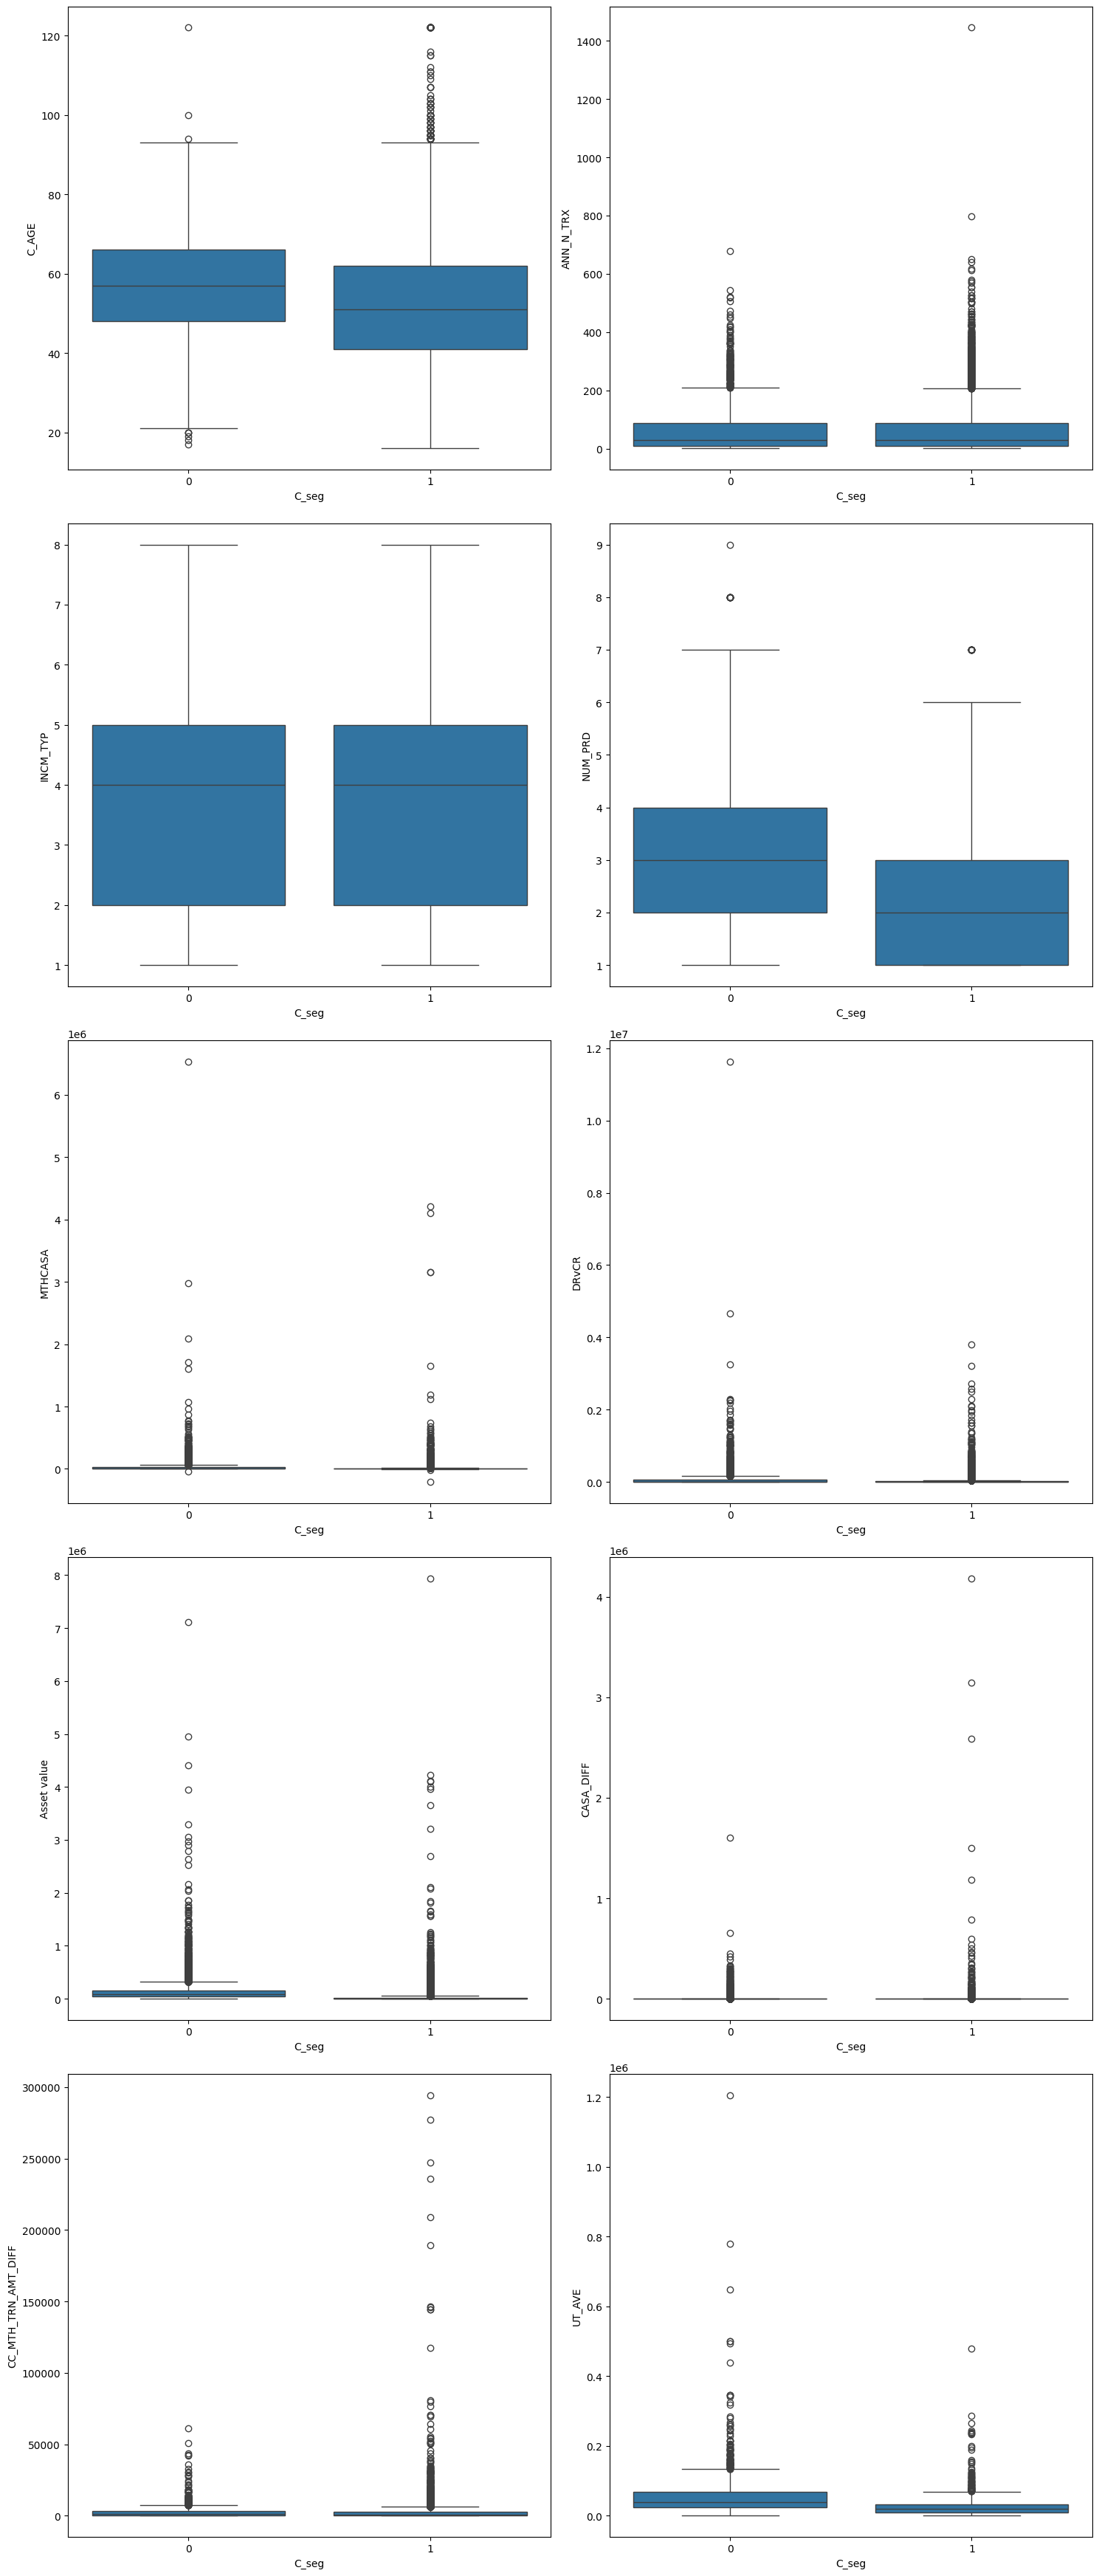

In [95]:
# create Box plot of list of columns for C_seg columns as 2 class.
import matplotlib.pyplot as plt
import seaborn as sns

df['C_seg'] = df['C_seg'].astype('category')
df['C_seg'] = df['C_seg'].cat.codes

# List of columns to create boxplots for
columns = ["C_AGE", 'ANN_N_TRX', 'INCM_TYP', 'NUM_PRD', 'MTHCASA', 'DRvCR','Asset value',"CASA_DIFF","CC_MTH_TRN_AMT_DIFF", 'UT_AVE']

# Calculate number of rows needed for subplots
nrows = int(len(columns) / 2)

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 35))

# Create a boxplot on each subplot
for i, col in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x='C_seg', y=columns[i], data=df, ax=axes[row, col])

plt.tight_layout()
plt.show()

